In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elenafylymonova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# !pip install -r requirements.txt


In [21]:
data = pd.read_csv('Data/amazon_alexa.tsv', delimiter = '\t', quoting = 3)
data.shape

(3150, 5)

In [22]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [26]:
print(data.rating.value_counts())
print(data.feedback.value_counts())
print(data.variation.value_counts())



rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64
feedback
1    2893
0     257
Name: count, dtype: int64
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


In [29]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [28]:
data.dropna(inplace = True)

In [30]:
# create column length for lemfth of verified_reviews
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [33]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

<Axes: xlabel='rating', ylabel='Count'>

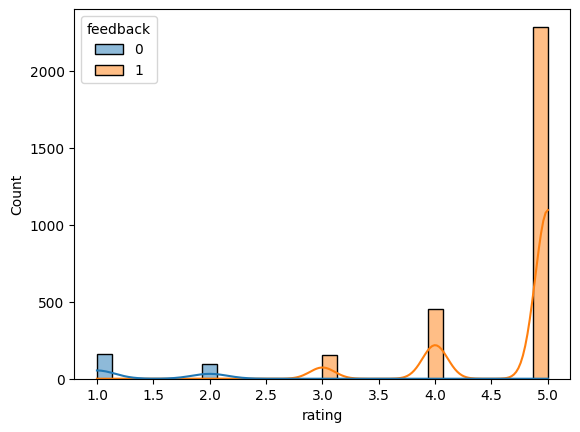

In [59]:
sns.histplot(data=data, x='rating', hue='feedback', kde=True, bins=30)


<Axes: xlabel='rating'>

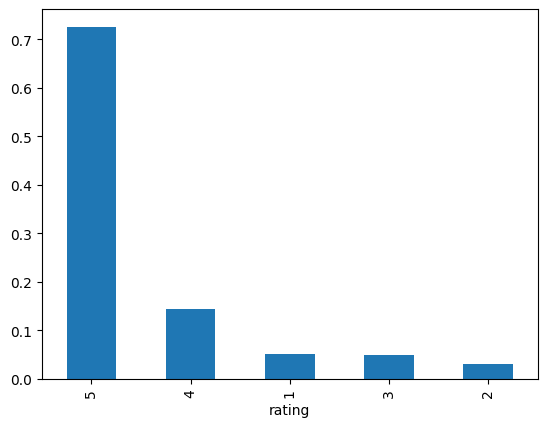

In [36]:
data.rating.value_counts(normalize=True).plot.bar()

In [41]:
review_0 = data[data['feedback'] == 0].iloc[1, 3]
# review_1 = data[data['feedback'] == 1]
review_0

'Sound is terrible if u want good music too get a bose'

<Axes: ylabel='Percentage wise distrubution of feedback'>

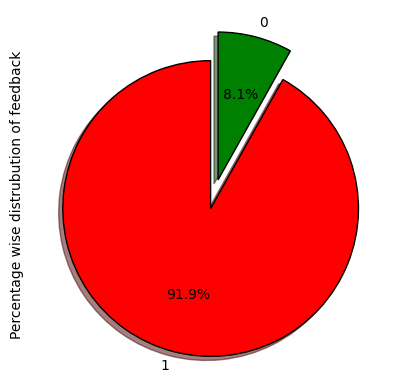

In [50]:
tags = data.feedback.value_counts(normalize=True)

explode=(0.1,0.1)
wp = {'linewidth':1, "edgecolor":'black'}
colors = ('red', 'green')
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [64]:
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [65]:
print(f'Variation value count: \n{data["variation"].value_counts()}')

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


In [56]:
data.groupby('variation')['rating'].mean()


variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

In [57]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

<Axes: xlabel='length', ylabel='Count'>

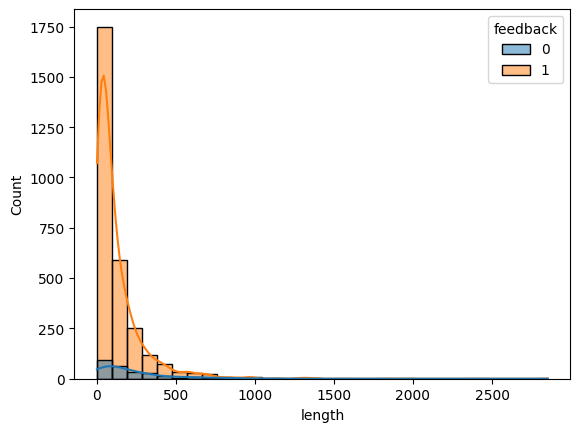

In [58]:
sns.histplot(data=data, x='length', hue='feedback', kde=True, bins=30)

In [ ]:
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(data['verified_reviews']).toarray()
y = data['feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

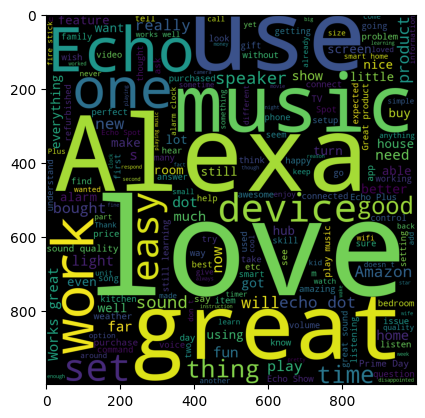

In [61]:
# combine all reviews
reviews = ' '.join(data['verified_reviews'])
wc = WordCloud(width=1000, height=1000).generate(reviews)
plt.imshow(wc)

### **Preprocess and Model**

In [67]:
%%timeit
corpus = []
stemmer = PorterStemmer()

for i in range(0, data.shape[0]):
    review = re.sub("[^a-zA-Z]", " ", data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = " ".join(review)
    corpus.append(review)

778 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
%%timeit
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Use a list comprehension to process the reviews
corpus = [
    ' '.join(
        [stemmer.stem(word) for word in re.sub('[^a-zA-Z]', ' ', review).lower().split() if word not in stop_words]
    ) for review in data['verified_reviews']
]

570 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
cv = CountVectorizer(max_features=2500, stop_words='english')
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#Saving the Count Vectorizer
# pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [75]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (3149, 2500)
y shape: (3149,)


In [79]:
# split data into train and test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [80]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [81]:
# save scaler model
# pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))


<div style='background-color:LightCoral; font-size:24px;'><strong>Model

<div style='background-color:LightCoral; font-size:24px;'><strong>**Random Forest**

In [93]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9473684210526315
Testing Accuracy : 0.9111111111111111


In [83]:
y_preds = model_rf.predict(X_test_scl)

In [84]:
confusion_matrix(y_test, y_preds)

array([[ 20,  72],
       [ 12, 841]])

In [86]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9392019744960921
Standard Variance : 0.008884775343607338


In [87]:
params = {
    'bootstrap':[True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [92]:
cv_object = StratifiedKFold(n_splits=2)
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv=cv_object, verbose=0, return_train_score=True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [94]:
# getting the best params from GridSerach
print('Best Params: ', grid_search.best_params_)
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Params:  {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}
Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [96]:
# cross validation for train and test
print('Cross Validation Mean Accuracy on Train: ', grid_search.cv_results_['mean_train_score'].mean())
print('Cross Validation Mean Accuracy on Test: ', grid_search.cv_results_['mean_test_score'].mean())

print('Accuracy on Train: ', accuracy_score(y_test, y_preds))


Cross Validation Mean Accuracy on Train:  0.96875
Cross Validation Mean Accuracy on Test:  0.9302971869328494
Accuracy on Train:  0.9111111111111111


<div style='background-color:LightCoral; font-size:24px;'><strong>**XGBoost**

In [97]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
# accuracy of the model on training and testing data
print('Accuracy score :', model_xgb.score(X_train_scl, y_train))
print('Test Accuracy score :',model_xgb.score(X_test_scl, y_test))

Accuracy score : 0.9736842105263158
Test Accuracy score : 0.9132275132275133


In [100]:
y_preds_xgb = model_xgb.predict(X_test)

In [103]:
cm_xgb= confusion_matrix(y_test, y_preds_xgb)
cm_xgb

array([[ 27,  65],
       [ 14, 839]])

In [104]:
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

<div style='background-color:LightCoral; font-size:24px;'><strong>**Decision tree**

In [106]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [107]:
print('Train Accuracy :', model_dt.score(X_train_scl, y_train))
print('Test Accuracy :', model_dt.score(X_test_scl, y_test))


Train Accuracy : 0.9927404718693285
Test Accuracy : 0.9142857142857143


In [108]:
y_preds_dt = model_dt.predict(X_test)

In [109]:
cm_dt = confusion_matrix(y_test, y_preds_dt)
cm_dt

array([[ 43,  49],
       [ 57, 796]])